В основе данного подхода лежит предположение, что любой объект принадлежит ко всем кластерам, но с разной вероятностью.

Один из примеров EM (Expectation-maximization)-алгоритма — это k-means-кластеризация, рассмотренная нами ранее.

Алгоритм состоит из двух шагов. Если рассмотреть их на примере k-means, то:

на шаге E мы вычисляем, к какому кластеру будет относиться объект на основании расстояний до центроида;

на шаге M мы пересчитываем центроиды кластеров.

Когда данные распределены в форме вытянутых эллипсов (см. график ниже), алгоритм k-means не справляется с кластеризацией. В качестве альтернативы можно взять ещё один из алгоритмов EM-кластеризации — модель гауссовой смеси (Gaussian Mixture Model, GMM), в котором данные описываются функцией Гаусса. Это значит, что мы можем выделить два параметра для описания кластеров: среднее значение и стандартное отклонение. Если рассмотреть двухмерный случай, то кластеры могут принимать любую эллиптическую форму, так как есть стандартное отклонение в обоих направлениях (по x и по y).

![alt](https://lms.skillfactory.ru/assets/courseware/v1/ed5c25926a67660b3ad829436b4b55a2/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_17.png)

### ДЛЯ КАКИХ ЗАДАЧ ИСПОЛЬЗУЕТСЯ EM-КЛАСТЕРИЗАЦИЯ?

K-means-кластеризацию можно использовать для кластеризации документов по разным категориям, основываясь на тегах, заголовках или содержимом документа. Для этого текст документа представляется в виде вектора, а далее используется в кластеризации. Если у разных документов похожие векторы, их можно объединить в одну группу.

GMM можно использовать для сегментации изображений, например чтобы находить опухоли на снимках МРТ. Для этого мы представляем изображение в виде вектора и далее используем такое представление снимка в кластеризации.

Используя GMM, можно анализировать временные ряды цен в периоды действия акций.

### КАК ЗАПУСТИТЬ EM-КЛАСТЕРИЗАЦИЮ?

Запустим алгоритм на датасете покемонов и попробуем кластеризовать их по силе атаки и уровню защиты:

Пример в ноутбуке pokemon

In [1]:
# # импортируем библиотеки numpy и sklearn
# import numpy as np
# from sklearn.mixture import GaussianMixture

# gm_clustering = GaussianMixture(n_components=3, random_state=42)

# # обучаем модель 
# gm_clustering.fit(X)

# # для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
# gm_prediction = gm_clustering.predict(X)

Основные параметры, которые необходимо задать для запуска алгоритма GaussianMixture:

n_components — количество кластеров.

random_state — так как в алгоритме есть случайность при инициализации, то для воспроизводимости результатов от запуска к запуску следует передать какое-то число.

Параметров при запуске может быть больше, при желании можно почитать о них в документации sklearn:

In [2]:
# from sklearn.mixture import GaussianMixture
# help(GaussianMixture)
# # Help on class GaussianMixture in module sklearn.mixture._gaussian_mixture:

# class GaussianMixture(sklearn.mixture._base.BaseMixture)



![alt](https://lms.skillfactory.ru/assets/courseware/v1/58ebfed6624d2acb7cda5340a729b20b/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_21.png)

Алгоритм отлично справился со своей задачей и разделил данные на три кластера, которые получились однородными. Как видим, есть также одна точка-выброс, которую алгоритм не выделил в отдельный кластер.

Если выбрать количество кластеров, равное 4, получим следующий результат:

![alt](https://lms.skillfactory.ru/assets/courseware/v1/4c4f05ac7798f7e2b089b3e544f3ce6a/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_22.png)

### ПРЕИМУЩЕСТВА И НЕДОСТАТКИ EM-КЛАСТЕРИЗАЦИИ

### Приемущества:

Кластеры, которые находит этот алгоритм, могут принимать форму эллипса, а не ограничиваться окружностями. K-Means является частным случаем GMM.
![alt](https://lms.skillfactory.ru/assets/courseware/v1/32f24c20454faf47ee135cc0d6110e04/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_23.png)

Если объект находится в середине двух перекрывающихся кластеров, то, в отличие от k-means, не нужно решать, к какому кластеру он принадлежит: объект может принадлежать к двум разным кластерам с разной вероятностью.

![alt](https://lms.skillfactory.ru/assets/courseware/v1/afd530fb94ba7c77894c10464c118596/asset-v1:SkillFactory+DSPR-2.0+14JULY2021+type@asset+block/dst3-ml4-3_24.png)

### Недостатки:

Нужно задавать количество кластеров.

Чувствителен к тому, с какой точки начинается алгоритм.

Может медленно сходиться, т. е. искать, как оптимально описать кластеры.

In [3]:
import pandas as pd 
import numpy as np
from sklearn.mixture import GaussianMixture


Задание 5.4

Скачайте датасет, в котором представлены цены на однокомнатные квартиры и возраст этих квартир. Проведите кластеризацию GMM, используя два признака: цену и возраст квартир. Какое оптимальное количество кластеров получилось?

In [4]:
import seaborn as sns 
data = pd.read_csv('data/housing.csv')
data

,year,price
0,0.081091,23.790515
1,9.483270,10.784598
2,9.901805,10.003782
3,1.930438,21.879849
4,1.618601,21.851806
...,...,...
1350,12.580032,10.122039
1351,12.488949,9.934954
1352,10.693618,12.083653
1353,12.455530,10.304081


<AxesSubplot:>

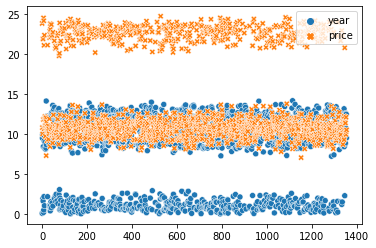

In [5]:
sns.scatterplot(data=data)

In [12]:
gm_clustering = GaussianMixture(n_components=3, random_state=42)

# обучаем модель 
gm_clustering.fit(data[['year', 'price']])

# для матрицы X получаем предсказания, к какому кластеру принадлежат объекты
gm_prediction = gm_clustering.predict(data[['year', 'price']])

<AxesSubplot:xlabel='year', ylabel='price'>

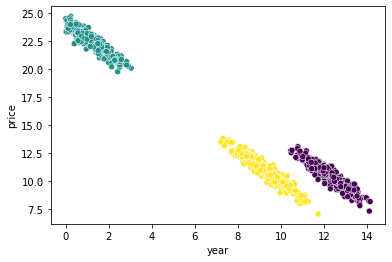

In [13]:
sns.scatterplot(x=data['year'], y=data['price'], c=gm_prediction)

Задание 5.5

Для датасета из предыдущего задания проведите кластеризацию с помощью алгоритма k-means. Какой алгоритм справился с задачей лучше?

<AxesSubplot:xlabel='year', ylabel='price'>

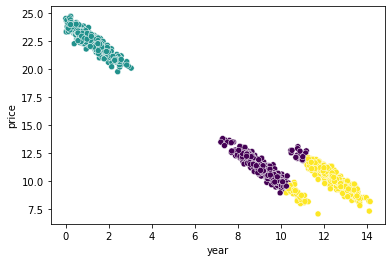

In [15]:
from sklearn.cluster import KMeans
kmeans_clustering = KMeans(n_clusters=3)
# обучим модель кластеризации и предскажем кластеры для наших данных
predictions_kmeans = kmeans_clustering.fit_predict(X=data[['year', 'price']])
# визуализируем результаты
sns.scatterplot(x=data.year, y=data.price, c=predictions_kmeans)